In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_csv("C:\\Users\SHREENATH S HEBBAR\\Documents\\python\\Machine Learning\\Projects\\titanic\\titanic_data.csv")

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
x=df.drop('Survived',axis=1)
y=df["Survived"]

In [11]:
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

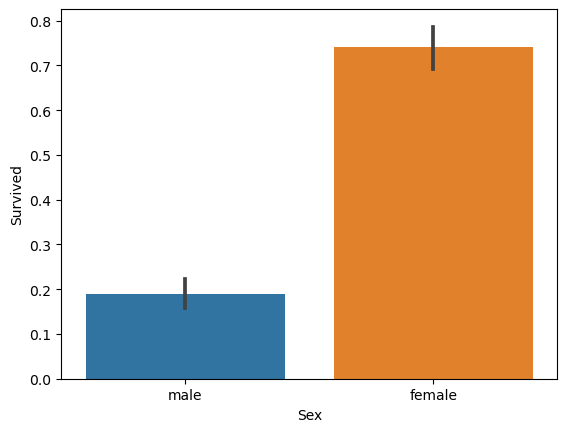

In [14]:
sns.barplot(x="Sex",y="Survived",data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

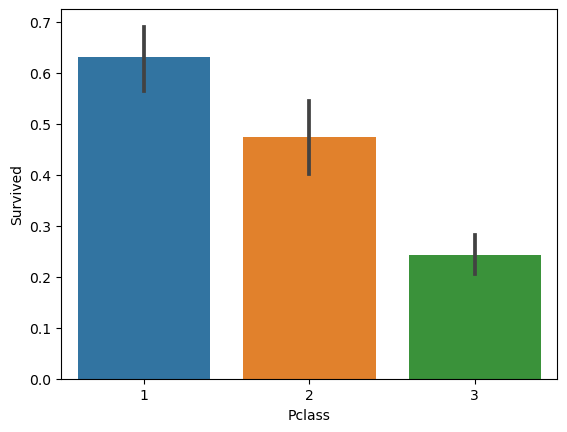

In [15]:
sns.barplot(x="Pclass",y="Survived",data=df)

In [28]:
df['Age']=df["Age"].fillna(-0.5)
x['Age']=x["Age"].fillna(-0.5)

In [17]:
bins=[-1,0,5,12,18,24,35,60,80,np.inf]
labels=['Unknown','Baby','Child','Tennager','Student','Young Adult','Adult','Senior','SuperSenior']

In [43]:
df['AgeGroup']=pd.cut(df['Age'],bins,labels=labels)
x['AgeGroup']=df['AgeGroup']

In [45]:
df["AgeGroup"].head()


0        Student
1          Adult
2    Young Adult
3    Young Adult
4    Young Adult
Name: AgeGroup, dtype: category
Categories (9, object): ['Unknown' < 'Baby' < 'Child' < 'Tennager' ... 'Young Adult' < 'Adult' < 'Senior' < 'SuperSenior']

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='AgeGroup', ylabel='Survived'>

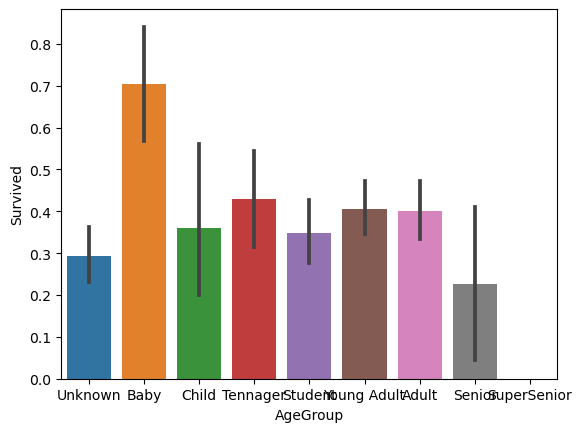

In [42]:
sns.barplot(x='AgeGroup',y='Survived',data=df)

In [46]:
df=df.drop(['Ticket','Cabin','Fare'],axis=1)
x=x.drop(['Ticket','Cabin','Fare'],axis=1)

In [47]:

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       2
AgeGroup       0
dtype: int64

In [48]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [50]:
df["Embarked"]=df["Embarked"].fillna('S')
x["Embarked"]=x["Embarked"].fillna('S')

str

In [53]:
combine=[df,x]
for dataset in combine:
    dataset["Title"]=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)

In [55]:
pd.crosstab(df["Title"],df["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [56]:
df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [63]:
for dataset in combine:
    dataset["Title"]=dataset["Title"].replace(['Lady','Capt','Col','Don','Dr','Major','Rev','Jonkheer','Dona'],'Rare')
    dataset["Title"]=dataset["Title"].replace(["Countess",'Sir'],'Royal')
    dataset["Title"]=dataset["Title"].replace('Mlle','Miss')
    dataset["Title"]=dataset["Title"].replace('Ms','Miss')
    dataset["Title"]=dataset["Title"].replace('Mme','Mrs')
df[['Title','Survived']].groupby(['Title'],as_index=False).mean()


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [64]:
df[['Title','Survived']].groupby(['Title'],as_index=True).sum()

,Survived
Title,
Master,23
Miss,130
Mr,81
Mrs,100
Rare,6
Royal,2


In [66]:
df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare', 'Royal'], dtype=object)

In [68]:
map1={'Mr':1,'Mrs':2,'Miss':3,'Master':4,'Rare':5,'Royal':6}
for dataset in combine:
    dataset["Title"]=dataset["Title"].map(map1)
    dataset["Title"]=dataset["Title"].fillna(0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,1


In [69]:
mr_age=df[df['Title']==1]["AgeGroup"].mode()
miss_age=df[df['Title']==2]["AgeGroup"].mode()
mrs_age=df[df['Title']==3]["AgeGroup"].mode()
master_age=df[df['Title']==4]["AgeGroup"].mode()
royal_age=df[df['Title']==5]["AgeGroup"].mode()
rare_age=df[df['Title']==6]["AgeGroup"].mode()


In [70]:

print(mr_age)
print(miss_age)
print(mr_age)
print(master_age)
print(royal_age)
print(rare_age)


0    Young Adult
Name: AgeGroup, dtype: category
Categories (9, object): ['Unknown' < 'Baby' < 'Child' < 'Tennager' ... 'Young Adult' < 'Adult' < 'Senior' < 'SuperSenior']
0    Adult
Name: AgeGroup, dtype: category
Categories (9, object): ['Unknown' < 'Baby' < 'Child' < 'Tennager' ... 'Young Adult' < 'Adult' < 'Senior' < 'SuperSenior']
0    Young Adult
Name: AgeGroup, dtype: category
Categories (9, object): ['Unknown' < 'Baby' < 'Child' < 'Tennager' ... 'Young Adult' < 'Adult' < 'Senior' < 'SuperSenior']
0    Baby
Name: AgeGroup, dtype: category
Categories (9, object): ['Unknown' < 'Baby' < 'Child' < 'Tennager' ... 'Young Adult' < 'Adult' < 'Senior' < 'SuperSenior']
0    Adult
Name: AgeGroup, dtype: category
Categories (9, object): ['Unknown' < 'Baby' < 'Child' < 'Tennager' ... 'Young Adult' < 'Adult' < 'Senior' < 'SuperSenior']
0    Young Adult
1          Adult
Name: AgeGroup, dtype: category
Categories (9, object): ['Unknown' < 'Baby' < 'Child' < 'Tennager' ... 'Young Adult' < 'Adult

In [71]:
age1={1:'Young Adult',2:"Student",3:'Adult',4:'Baby',5:'Adult',6:'Adult'}

In [79]:
for i in range(len(df["AgeGroup"])):
    if df["AgeGroup"][i]=='Unknown':
        df["AgeGroup"][i]=age1[df['Title'][i]]

        


In [80]:
df["AgeGroup"].unique()

['Student', 'Adult', 'Young Adult', 'Baby', 'Tennager', 'Child', 'Senior']
Categories (9, object): ['Unknown' < 'Baby' < 'Child' < 'Tennager' ... 'Young Adult' < 'Adult' < 'Senior' < 'SuperSenior']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,1


In [81]:
from sklearn.preprocessing import LabelEncoder

In [85]:
le=LabelEncoder()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,1


In [86]:
c1=['Sex','AgeGroup','Embarked']
for i in c1:
    df[i]=le.fit_transform(df[i])

In [87]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,2,4,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,2,6,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,2,6,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,2,6,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,2,6,5
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,2,4,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,-0.5,1,2,2,0,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,0,6,1


In [88]:
x=df.drop(["PassengerId",'Name','Survived'],axis=1)
y=df["Survived"]

In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [92]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pr=lr.predict(x_test)

In [93]:
pr

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [95]:
from sklearn.metrics import accuracy_score
log2=accuracy_score(y_test,pr)

In [96]:
print("Accuracy is",log2)

Accuracy is 0.776536312849162
